# Project 2 - Data Wrangle and Analyze Data

#### Student: Waldecyr Souza

# Introduction

#### The effort to gather, assess and clean the data obtained from different sources was motivated to answer the following questions:
- What are the most frequent breeds?
- What breeds receive more favorites?
- What dogs stage receive more retweets?

#### The lines below present the steps in order to have these insights. The visualizations were prepared in Tableau and are presented in pdf file.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json 

import tweepy
from tweepy import OAuthHandler
from twython import Twython

import matplotlib.pyplot as plt
from matplotlib import pyplot, pylab
% matplotlib inline

_____________
# Twitter keys and tokens

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = '-'
access_secret = ''

In [3]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

______________________
# Gather

## 1 of 2 - image-predictions.tsv

Downloading the dataframe programmatically from internet.

df name: df_breed

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = requests.get(url)

with open((url.split('/')[-1]), mode = 'wb') as file:
        file.write(image_predictions.content)
        
df_breed = pd.read_csv('image-predictions.tsv', sep='\t')
df_breed.sample(2)

tweet_id                                          jpg_url  \
1030  711306686208872448  https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg   
99    667773195014021121  https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg   

      img_num                           p1   p1_conf  p1_dog          p2  \
1030        1           leatherback_turtle  0.280835   False  loggerhead   
99          1  West_Highland_white_terrier  0.360465    True         pug   

       p2_conf  p2_dog              p3   p3_conf  p3_dog  
1030  0.123290   False  Dandie_Dinmont  0.086792    True  
99    0.093494    True        ice_bear  0.069038   False

## 2 of 2 - 2k_tweets

This file was already available for this project.

df name: df_2k

In [5]:
df_2k_twt = pd.read_csv('twitter-archive-enhanced.csv')
df_2k_twt.sample(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
853   765371061932261376                    NaN                  NaN   
1005  747651430853525504           7.476487e+17         4.196984e+09   

                      timestamp  \
853   2016-08-16 02:14:15 +0000   
1005  2016-06-28 04:42:46 +0000   

                                                 source  \
853   <a href="http://twitter.com/download/iphone" r...   
1005  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
853   This is Louie. He's had a long day. Did a lot ...                  NaN   
1005  Other pupper asked not to have his identity sh...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
853                        NaN                        NaN   
1005                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
853   https://twitter.com/dog_rates/status/765371061...                11   
1005                                                NaN                12   

      rating_denominator   name doggo floofer  pupper puppo  
853                   10  Louie  None    None  pupper  None  
1005                  10   None  None    None  pupper  None

# Assess

## df_breed

Let us print again some more rows of each dataframe so we can see if there are issues to deal with. We shoud print some information regarding them.

In [6]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df_breed.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [8]:
df_breed.sample(10, random_state=2)

tweet_id                                          jpg_url  \
756   688519176466644993  https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg   
2004  877316821321428993  https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg   
1044  712717840512598017  https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg   
1563  793601777308463104  https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg   
1696  816450570814898180  https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg   
1715  819004803107983360  https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   
1988  872820683541237760  https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg   
1660  811627233043480576  https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg   
404   673705679337693185  https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg   
1153  732726085725589504  https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg   

      img_num                  p1   p1_conf  p1_dog                 p2  \
756         1            Pembroke  0.696372    True           Cardigan   
2004        1              Saluki  0.509967    True  Italian_greyhound   
1044        1      Great_Pyrenees  0.732043    True             kuvasz   
1563        1  miniature_pinscher  0.538981    True          Chihuahua   
1696        1            web_site  0.352857   False           envelope   
1715        1     standard_poodle  0.351308    True         toy_poodle   
1988        3                 pug  0.999120    True     French_bulldog   
1660        1              beagle  0.396280    True           Pembroke   
404         1            Shih-Tzu  0.165383    True              Lhasa   
1153        1          Pomeranian  0.961902    True            Samoyed   

       p2_conf  p2_dog                       p3   p3_conf  p3_dog  
756   0.121052    True        Shetland_sheepdog  0.050592    True  
2004  0.090497    True         golden_retriever  0.079406    True  
1044  0.121375    True          Irish_wolfhound  0.049524    True  
1563  0.217830    True              toy_terrier  0.089149    True  
1696  0.060107   False                     nail  0.031291   False  
1715  0.271929    True          Tibetan_terrier  0.094759    True  
1988  0.000552    True             bull_mastiff  0.000073    True  
1660  0.049562    True  wire-haired_fox_terrier  0.046349    True  
404   0.116977    True        Yorkshire_terrier  0.063899    True  
1153  0.024289    True                     chow  0.005772    True

## Issues detected on breed_df:
Issue 1 (quality): tweet_id column must not be integer.

Issue 2 (quality): Confiability of non breed prediction are useless. We must turn these values to 0.

Issue 3 (quality): We have rows with 3 values "False" for the predictions. This rows are useless. (e.g. index 1696)

Issue 4 (quality): We should have only one column with the higher prediction of True breed.

Issue 5 (tidiness): We should have only one column with the breed.

Issue 6 (tidiness): We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

Issue 7 (quality): Some breed name are capitalized and some are not. (lines 3 and 4)

## df_2k_twt

In [9]:
df_2k_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_2k_twt.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [11]:
df_2k_twt.sample(20, random_state=5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1291  708119489313951744                    NaN                  NaN   
2109  670449342516494336                    NaN                  NaN   
2325  666418789513326592                    NaN                  NaN   
1400  699446877801091073                    NaN                  NaN   
65    879492040517615616                    NaN                  NaN   
54    881666595344535552                    NaN                  NaN   
2179  669006782128353280                    NaN                  NaN   
183   856543823941562368                    NaN                  NaN   
1771  678334497360859136                    NaN                  NaN   
1765  678410210315247616                    NaN                  NaN   
1728  679872969355714560                    NaN                  NaN   
2026  671879137494245376                    NaN                  NaN   
929   754482103782404096                    NaN                  NaN   
680   788908386943430656                    NaN                  NaN   
1683  681694085539872773                    NaN                  NaN   
1051  742534281772302336                    NaN                  NaN   
676   789314372632018944                    NaN                  NaN   
894   759197388317847553                    NaN                  NaN   
503   813066809284972545                    NaN                  NaN   
432   820749716845686786                    NaN                  NaN   

                      timestamp  \
1291  2016-03-11 02:36:57 +0000   
2109  2015-11-28 03:49:14 +0000   
2325  2015-11-17 00:53:15 +0000   
1400  2016-02-16 04:15:05 +0000   
65    2017-06-27 00:10:17 +0000   
54    2017-07-03 00:11:11 +0000   
2179  2015-11-24 04:17:01 +0000   
183   2017-04-24 16:22:16 +0000   
1771  2015-12-19 22:02:01 +0000   
1765  2015-12-20 03:02:53 +0000   
1728  2015-12-24 03:55:21 +0000   
2026  2015-12-02 02:30:43 +0000   
929   2016-07-17 01:05:25 +0000   
680   2016-10-20 01:03:11 +0000   
1683  2015-12-29 04:31:49 +0000   
1051  2016-06-14 01:49:03 +0000   
676   2016-10-21 03:56:25 +0000   
894   2016-07-30 01:22:17 +0000   
503   2016-12-25 17:00:08 +0000   
432   2017-01-15 21:49:15 +0000   

                                                 source  \
1291  <a href="http://twitter.com/download/iphone" r...   
2109  <a href="http://twitter.com/download/iphone" r...   
2325  <a href="http://twitter.com/download/iphone" r...   
1400  <a href="http://twitter.com/download/iphone" r...   
65    <a href="http://twitter.com/download/iphone" r...   
54    <a href="http://twitter.com/download/iphone" r...   
2179  <a href="http://twitter.com/download/iphone" r...   
183   <a href="http://twitter.com/download/iphone" r...   
1771  <a href="http://twitter.com/download/iphone" r...   
1765  <a href="http://twitter.com/download/iphone" r...   
1728  <a href="http://vine.co" rel="nofollow">Vine -...   
2026  <a href="http://twitter.com/download/iphone" r...   
929   <a href="http://twitter.com/download/iphone" r...   
680   <a href="http://twitter.com/download/iphone" r...   
1683  <a href="http://twitter.com/download/iphone" r...   
1051  <a href="http://vine.co" rel="nofollow">Vine -...   
676   <a href="http://twitter.com/download/iphone" r...   
894   <a href="http://twitter.com/download/iphone" r...   
503   <a href="http://twitter.com/download/iphone" r...   
432   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1291  This is Cooper. He basks in the glory of rebel...                  NaN   
2109  Vibrant dog here. Fabulous tail. Only 2 legs t...                  NaN   
2325  This is Walter. He is an Alaskan Terrapin. Lov...                  NaN   
1400  This is Archie. He's undercover in all these p...                  NaN   
65    This is Bailey. He thinks you should measure e...                  NaN   
54    This is Gary. He couldn't miss this puppe

## Issues detected on df_2k_twt:
Issue 8 (quality): tweet_id column is an integer. It should not be an object.

Issue 9 (quality): Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.
 
Issue 10 (quality): Denominator Values range from 0 to 170. There should have only value "10".
 
Issue 11 (quality): The values "None" in columns doggo, floofer, pupper and puppo should be Null values.
 
Issue 12 (tidiness): Four columns with variable names: doggo, floofer, pupper and puppo.
 
Issue 13 (quality): There are two important columns missing: retweet count and favorite count.





# Gather and assess (again)

### Gather the missing 2 columns:  retweet count and favorite count

In [12]:
tweet_id = list(df_2k_twt.tweet_id)

In [ ]:
tweet_data = {}
for tweet in tweet_id:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    
    except:
        print("Error for: " + str(tweet))
     

Creating a json file "tweet_json.txt", reading it and saving as a variable:

In [ ]:
with open('tweet_json.txt', 'w') as f:
    json.dump(tweet_data, f)

In [13]:
with open('tweet_json.txt') as f:
    tweet_json = json.load(f)

Creating a list with the json information and converting as a df.

df name: tweets_df

In [14]:
df_list = []

for tweet_id in tweet_json.keys():
    retweets = tweet_json[tweet_id]['retweet_count']
    favorites = tweet_json[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                    'retweets': retweets,
                    'favorites': favorites})
    
df_2k_twt_2_columns = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
df_2k_twt_2_columns.sample(5)

tweet_id  retweets  favorites
375   826848821049180160     11009      38389
936   751950017322246144       999       3228
1627  684097758874210310      1526       4281
976   748699167502000129      1703       4960
2251  667524857454854144      1117       1705

In [15]:
df_2k_twt_2_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null object
retweets     2340 non-null int64
favorites    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


 
## Issue 14 - Tidiness
- Since its all about tweets. Its approprieted to have only one master dataframe. 

# Issues list to be fixed

### Quality
#### Issues detected on breed_df:
- tweet_id column is an integer. It should not be an object.
- Confiability of non breed prediction are useless. We must turn these values to 0.
- We have rows with 3 values "False" for the predictions. This rows are useless. (e.g. index 1696)
- We should have only one column with the higher prediction of True breed.
- Some breed name are capitalized and some are not. (lines 3 and 4)

#### Issues detected on df_2k_twt:

- tweet_id column is an integer. It should not be an object.
- Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.
- Denominator Values range from 0 to 170. There should have only value "10".
- The values "None" in columns doggo, floofer, pupper and puppo should be Null values.
- There are two important columns missing: retweet count and favorite count.



### Tidiness
#### Issues detected on breed_df:

- We should have only one column with the breed.
- We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

#### Issues detected on df_2k_twt:
- Four columns with variable names: doggo, floofer, pupper and puppo.

#### Since its all about tweets. Its approprieted to have only one master dataframe. 

# Clean

Before start cleaning, we are going to make a copy of each dataframe:


In [16]:
df_breed_v1 = df_breed.copy()
df_2k_twt_v1 = df_2k_twt.copy()
df_2k_twt_2_columns_v1 = df_2k_twt_2_columns.copy()

## df_breed

### Issue 1

- tweet_id column is an integer. It should not be an object.

#### Define
Change the column datatype.

#### Code



In [17]:
df_breed_v1.tweet_id = df_breed_v1.tweet_id.astype('str')

#### Test

In [18]:
df_breed_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 2

- Confiability of non breed prediction are useless. We must turn these values to 0.

#### Define
Change the prediction of non breed values to 0.

#### Code



In [19]:
mask = df_breed_v1.p1_dog == False
column_name = 'p1_conf'
df_breed_v1.loc[mask, column_name] = 0

mask = df_breed_v1.p2_dog == False
column_name = 'p2_conf'
df_breed_v1.loc[mask, column_name] = 0

mask = df_breed_v1.p3_dog == False
column_name = 'p3_conf'
df_breed_v1.loc[mask, column_name] = 0


#### Test

In [20]:
df_breed_v1.sample(10, random_state=50)

tweet_id                                          jpg_url  \
1843  838561493054533637  https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg   
303   671511350426865664  https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg   
421   674045139690631169  https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg   
1432  773308824254029826  https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg   
1745  822975315408461824  https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg   
426   674082852460433408  https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg   
1515  786709082849828864  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg   
1533  789986466051088384  https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1702  817171292965273600  https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg   
1337  758405701903519748  https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg   

      img_num                        p1   p1_conf  p1_dog                  p2  \
1843        1                    kelpie  0.216562    True             doormat   
303         1               hermit_crab  0.000000   False                tick   
421         1                     robin  0.000000   False   rhinoceros_beetle   
1432        1             shopping_cart  0.000000   False  Labrador_retriever   
1745        1                   bathtub  0.000000   False                 tub   
426         1                Pomeranian  0.666957    True   Shetland_sheepdog   
1515        1                Pomeranian  0.467321    True         Persian_cat   
1533        1                       tub  0.000000   False             bathtub   
1702        1          golden_retriever  0.295483    True        Irish_setter   
1337        4  Chesapeake_Bay_retriever  0.702954    True              laptop   

       p2_conf  p2_dog                        p3   p3_conf  p3_dog  
1843  0.000000   False                 dalmatian  0.132820    True  
303   0.000000   False                     snail  0.000000   False  
421   0.000000   False  European_fire_salamander  0.000000   False  
1432  0.151406    True           shopping_basket  0.000000   False  
1745  0.000000   False                  Pembroke  0.233162    True  
426   0.028019    True                  ski_mask  0.000000   False  
1515  0.000000   False                      chow  0.102654    True  
1533  0.000000   False          golden_retriever  0.078530    True  
1702  0.144431    True  Chesapeake_Bay_retriever  0.077879    True  
1337  0.000000   False                  notebook  0.000000   False

### issue 3

- We have rows with 3 values "False" for the predictions. This rows are useless.

#### Define
Delete all rows that have value "False" for the three predictions.

#### Code

In [21]:
df_breed_v1 = df_breed_v1.drop(df_breed_v1[(df_breed_v1.p1_dog == False) &
                                           (df_breed_v1.p2_dog == False) &
                                           (df_breed_v1.p3_dog == False)].index)

df_breed_v1 = df_breed_v1.reset_index(drop=True)

#### Test

In [22]:
df_breed_v1.sample(10, random_state=100)

tweet_id                                          jpg_url  \
751   704347321748819968  https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg   
1705  882045870035918850  https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
529   683742671509258241  https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg   
170   670093938074779648  https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg   
1263  789137962068021249  https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg   
1465  823939628516474880  https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg   
107   668507509523615744  https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg   
1357  806219024703037440  https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg   
805   708810915978854401  https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg   
110   668542336805281792  https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg   

      img_num                              p1   p1_conf  p1_dog  \
751         1                           teddy  0.000000   False   
1705        1                        web_site  0.000000   False   
529         1                        Pembroke  0.895279    True   
170         1                      toy_poodle  0.383346    True   
1263        2                       Chihuahua  0.746135    True   
1465        1                      schipperke  0.234076    True   
107         1                         basenji  0.055379    True   
1357        1                            chow  0.835102    True   
805         2                golden_retriever  0.976139    True   
110         1  American_Staffordshire_terrier  0.267695    True   

                          p2   p2_conf  p2_dog                         p3  \
751              feather_boa  0.000000   False           Brittany_spaniel   
1705                   dhole  0.000000   False           golden_retriever   
529                 Cardigan  0.022385    True             cocker_spaniel   
170         miniature_poodle  0.153678    True                       chow   
1263                Pekinese  0.070383    True                   Pembroke   
1465  curly-coated_retriever  0.193093    True         Labrador_retriever   
107        Shetland_sheepdog  0.054322    True                    whippet   
1357              Pomeranian  0.040783    True                 Eskimo_dog   
805       Labrador_retriever  0.016301    True            Norfolk_terrier   
110           French_bulldog  0.254050    True  Staffordshire_bullterrier   

       p3_conf  p3_dog  
751   0.082917    True  
1705  0.006941    True  
529   0.017045    True  
170   0.138543    True  
1263  0.049237    True  
1465  0.095197    True  
107   0.051913    True  
1357  0.021274    True  
805   0.001871    True  
110   0.212381    True

In [23]:
print("Number of dropped rows: {}".format(len(df_breed) - len(df_breed_v1)))

Number of dropped rows: 324


### issue 4
-  We should have only one colum with the higher prediction of True breed.

#### Define
Create a colum with variables based on p1_dog, p2_dog or p3_dog. So we can assure the best prediction value is there.

#### Code

In [24]:
df_breed_v1['best_prediction'] = df_breed_v1[['p1_conf','p2_conf','p3_conf']].max(axis=1)

##### Test

In [25]:
df_breed_v1.sample(10, random_state=100)

tweet_id                                          jpg_url  \
751   704347321748819968  https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg   
1705  882045870035918850  https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
529   683742671509258241  https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg   
170   670093938074779648  https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg   
1263  789137962068021249  https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg   
1465  823939628516474880  https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg   
107   668507509523615744  https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg   
1357  806219024703037440  https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg   
805   708810915978854401  https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg   
110   668542336805281792  https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg   

      img_num                              p1   p1_conf  p1_dog  \
751         1                           teddy  0.000000   False   
1705        1                        web_site  0.000000   False   
529         1                        Pembroke  0.895279    True   
170         1                      toy_poodle  0.383346    True   
1263        2                       Chihuahua  0.746135    True   
1465        1                      schipperke  0.234076    True   
107         1                         basenji  0.055379    True   
1357        1                            chow  0.835102    True   
805         2                golden_retriever  0.976139    True   
110         1  American_Staffordshire_terrier  0.267695    True   

                          p2   p2_conf  p2_dog                         p3  \
751              feather_boa  0.000000   False           Brittany_spaniel   
1705                   dhole  0.000000   False           golden_retriever   
529                 Cardigan  0.022385    True             cocker_spaniel   
170         miniature_poodle  0.153678    True                       chow   
1263                Pekinese  0.070383    True                   Pembroke   
1465  curly-coated_retriever  0.193093    True         Labrador_retriever   
107        Shetland_sheepdog  0.054322    True                    whippet   
1357              Pomeranian  0.040783    True                 Eskimo_dog   
805       Labrador_retriever  0.016301    True            Norfolk_terrier   
110           French_bulldog  0.254050    True  Staffordshire_bullterrier   

       p3_conf  p3_dog  best_prediction  
751   0.082917    True         0.082917  
1705  0.006941    True         0.006941  
529   0.017045    True         0.895279  
170   0.138543    True         0.383346  
1263  0.049237    True         0.746135  
1465  0.095197    True         0.234076  
107   0.051913    True         0.055379  
1357  0.021274    True         0.835102  
805   0.001871    True         0.976139  
110   0.212381    True         0.267695

### issue 5
- We should have only one colum with the breed according to the highest prediction.

#### Define
Create a colum with variables based on p1, p2 or p3. So we can assure the best breed prediction is there.

#### Code

In [26]:
conditions = [
    (df_breed_v1['p1_conf'] == df_breed_v1['best_prediction']),
    (df_breed_v1['p2_conf'] == df_breed_v1['best_prediction']),
    (df_breed_v1['p3_conf'] == df_breed_v1['best_prediction'])]

choices = [
    df_breed_v1['p1'],
    df_breed_v1['p2'],
    df_breed_v1['p3']]

df_breed_v1['breed'] = np.select(conditions, choices)

In [27]:
df_breed_v1.sample(10)

tweet_id                                          jpg_url  \
1499  829861396166877184  https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg   
1589  849412302885593088  https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg   
112   668623201287675904  https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg   
800   708356463048204288  https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg   
955   736365877722001409  https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg   
1114  760656994973933572  https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg   
556   685315239903100929  https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg   
1301  794355576146903043  https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg   
1094  758041019896193024  https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg   
1298  793845145112371200  https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg   

      img_num                    p1   p1_conf  p1_dog  \
1499        1        Border_terrier  0.394486    True   
1589        4            schipperke  0.907559    True   
112         4             Chihuahua  0.708163    True   
800         2                   pug  0.871283    True   
955         3                   cup  0.000000   False   
1114        1      golden_retriever  0.760546    True   
556         2                  chow  0.470162    True   
1301        1        cocker_spaniel  0.500509    True   
1094        1              bookshop  0.000000   False   
1298        1  Old_English_sheepdog  0.765277    True   

                             p2   p2_conf  p2_dog  \
1499  Staffordshire_bullterrier  0.376574    True   
1589           crossword_puzzle  0.000000   False   
112                  Pomeranian  0.091372    True   
800              French_bulldog  0.041820    True   
955                  toy_poodle  0.082606    True   
1114         Labrador_retriever  0.232079    True   
556                  Pomeranian  0.159677    True   
1301           golden_retriever  0.272734    True   
1094                   Cardigan  0.051265    True   
1298         Bedlington_terrier  0.112753    True   

                                  p3   p3_conf  p3_dog  best_prediction  \
1499  American_Staffordshire_terrier  0.031292    True         0.394486   
1589                       Chihuahua  0.016191    True         0.907559   
112                             titi  0.000000   False         0.708163   
800                       bath_towel  0.000000   False         0.871283   
955                         consomme  0.000000   False         0.082606   
1114                         redbone  0.002874    True         0.760546   
556                       Eskimo_dog  0.105074    True         0.470162   
1301                   jigsaw_puzzle  0.000000   False         0.500509   
1094            Bernese_mountain_dog  0.026596    True         0.051265   
1298              Kerry_blue_terrier  0.047662    True         0.765277   

                     breed  
1499        Border_terrier  
1589            schipperke  
112              Chihuahua  
800                    pug  
955             toy_poodle  
1114      golden_retriever  
556                   chow  
1301        cocker_spaniel  
1094              Cardigan  
1298  Old_English_sheepdog

### issue 6
- We have many columns regarding image predictions. We should only have 2: the breed and confidence of the prediction.

#### Define
Drop the columns: 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog'.

#### Code



In [28]:
df_breed_v1 = df_breed_v1.drop(columns=['img_num',
                                        'p1',
                                        'p1_conf',
                                        'p1_dog',
                                        'p2',
                                        'p2_conf',
                                        'p2_dog',
                                        'p3',
                                        'p3_conf',
                                        'p3_dog'])

##### Test

In [29]:
df_breed_v1.sample(5)

tweet_id                                          jpg_url  \
436   678255464182861824  https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg   
95    668204964695683073  https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg   
23    666407126856765440  https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
1722  885984800019947520  https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   
359   675149409102012420  https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg   

      best_prediction                    breed  
436          0.613819                Chihuahua  
95           0.655180       Labrador_retriever  
23           0.529139  black-and-tan_coonhound  
1722         0.972494         Blenheim_spaniel  
359          0.999876                     chow

### issue 7
- Some breed name are captalized and some are not.

#### Define
Lowercase all the strings in column "breed".

#### Code


In [30]:
df_breed_v1.breed = df_breed_v1.breed.str.lower()

#### Test

In [31]:
df_breed_v1.sample(5)

tweet_id                                          jpg_url  \
1636  863079547188785154  https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg   
1272  790698755171364864  https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg   
339   674739953134403584  https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg   
150   669393256313184256  https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg   
666   695314793360662529  https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg   

      best_prediction                 breed  
1636         0.275242      lakeland_terrier  
1272         0.996541  bernese_mountain_dog  
339          0.175915        dandie_dinmont  
150          0.359843        cocker_spaniel  
666          0.678547           maltese_dog

In [32]:
df_breed_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 4 columns):
tweet_id           1751 non-null object
jpg_url            1751 non-null object
best_prediction    1751 non-null float64
breed              1751 non-null object
dtypes: float64(1), object(3)
memory usage: 54.8+ KB


## df_2k_twt

### Issue 8

- tweet_id column is an integer. It should not be an object.

#### Define
Change the column datatype.

#### Code


In [33]:
df_2k_twt_v1.tweet_id = df_2k_twt_v1.tweet_id.astype('str')

#### Test

In [34]:
df_2k_twt_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### issue 9
- Reply status tweets and Retweets do not follow the pattern of the other We Rate Dogs tweets, so they make our data dirty.

#### Define

keep only non null values for 'in_reply_to_status_id' and 'in_reply_to_user_id' and drop these columns after that.

#### Code

In [35]:
df_2k_twt_v1 = df_2k_twt_v1[pd.isnull(df_2k_twt_v1['in_reply_to_status_id'])]

In [36]:
df_2k_twt_v1 = df_2k_twt_v1[pd.isnull(df_2k_twt_v1['retweeted_status_id'])]

In [37]:
df_2k_twt_v1 = df_2k_twt_v1.drop(columns=['in_reply_to_status_id',
                                          'retweeted_status_id',
                                          'in_reply_to_user_id',
                                        'retweeted_status_user_id',
                                        'retweeted_status_timestamp'])

#### Test


In [38]:
df_2k_twt_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB




### issue 10

- Denominator Values range from 0 to 170. There should have only value "10".

#### Define
Save file with denominator different from 10 in a different csv documentation. Drop these rows. Check and review manually all the values different from 10 according to the original tweet. Drop the rows that could not be reviwed. Append the reviewed rows into the main df.
#### Code

In [39]:
#Save rows with column "rating_denominator" not 10 to csv
df_2k_twt_v1_issue_denominator = df_2k_twt_v1.loc[df_2k_twt_v1['rating_denominator'] != 10]
df_2k_twt_v1_issue_denominator.to_csv("df_2k_twt_v1_issue_denominator.csv", index=False)

In [40]:
#Drop column "rating_denominator" not 10
df_2k_twt_v1 = df_2k_twt_v1.drop(df_2k_twt_v1[(df_2k_twt_v1.rating_denominator != 10)].index)

In [41]:
# Importing the table with de numerator and denominator reviwed.
df_2k_twt_v1_reviewed_rate_fraction = pd.read_csv('df_2k_twt_v1_denominator_reviewed.csv')
df_2k_twt_v1_reviewed_rate_fraction

tweet_id  wrong_rating_numerator  wrong_rating_denominator  \
0   820690176645140481                      84                        70   
1   758467244762497024                     165                       150   
2   740373189193256964                       9                        11   
3   731156023742988288                     204                       170   
4   722974582966214656                       4                        20   
5   716439118184652801                      50                        50   
6   713900603437621249                      99                        90   
7   710658690886586372                      80                        80   
8   709198395643068416                      45                        50   
9   704054845121142784                      60                        50   
10  697463031882764288                      44                        40   
11  684222868335505415                     121                       110   
12  682962037429899265                       7                        11   
13  677716515794329600                     144                       120   
14  675853064436391936                      88                        80   
15  666287406224695296                       1                         2   

    rating_numerator  rating_denominator issue_numerator_and_denominator  
0                 12                  10                    Plural issue  
1                 11                  10                    Plural issue  
2                 14                  10     Two fractions in the tweet.  
3                 12                  10                    Plural issue  
4                 13                  10     Two fractions in the tweet.  
5                 11                  10     Two fractions in the tweet.  
6                 11                  10     Two fractions in the tweet.  
7                 10                  10                    Plural issue  
8                  9                  10                    Plural issue  
9                 11                  10                    Plural issue  
10                11                  10                    Plural issue  
11                11                  10                    Plural issue  
12                10                  10     Two fractions in the tweet.  
13                12                  10                    Plural issue  
14                11                  10                    Plural issue  
15                 9                  10     Two fractions in the tweet.

In [42]:
#Import reviwed csv file
df_2k_twt_v1_2 = pd.read_csv('df_2k_twt_v1_2.csv')
df_2k_twt_v1_2.head()

tweet_id                  timestamp  \
0  8.210000e+17  2017-01-15 17:52:40 +0000   
1  8.110000e+17  2016-12-19 23:06:23 +0000   
2  7.580000e+17  2016-07-28 01:00:57 +0000   
3  7.400000e+17  2016-06-08 02:41:38 +0000   
4  7.310000e+17  2016-05-13 16:15:54 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  The floofs have been released I repeat the flo...   
1  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
2  Why does this never happen at my front door......   
3  After so many requests, this is Bretagne. She ...   
4  Say hello to this unbelievably well behaved sq...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/820690176...                12   
1  https://www.gofundme.com/sams-smile,https://tw...                24   
2  https://twitter.com/dog_rates/status/758467244...                11   
3  https://twitter.com/dog_rates/status/740373189...                14   
4  https://twitter.com/dog_rates/status/731156023...                12   

   rating_denominator  name doggo floofer pupper puppo  
0                  10  None  None    None   None  None  
1                   7   Sam  None    None   None  None  
2                  10  None  None    None   None  None  
3                  10  None  None    None   None  None  
4                  10  this  None    None   None  None

After checking every tweet with denominator issue, only one tweet needs to be dropped:
- Tweet ID 810984652412424192. It is a 24/7 smilling dog. Link: https://twitter.com/dog_rates/status/810984652412424192

All the other tweets had the denominator reviwed.

In [43]:
#Drop column "rating_denominator" not 10
df_2k_twt_v1_2 = df_2k_twt_v1_2.drop(df_2k_twt_v1_2[(df_2k_twt_v1_2.rating_denominator != 10)].index)

In [44]:
#append the reviewed rows to the original on
df_2k_twt_v2 = df_2k_twt_v1.append(df_2k_twt_v1_2, sort=True)

#### Test

In [45]:
df_2k_twt_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 16
Data columns (total 12 columns):
doggo                 2096 non-null object
expanded_urls         2093 non-null object
floofer               2096 non-null object
name                  2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
dtypes: int64(2), object(10)
memory usage: 212.9+ KB


In [46]:
#Check if the rows were dropped
print("Number of rows with denominator different from 10: {}".format
      (len(df_2k_twt_v2.loc[df_2k_twt_v2['rating_denominator'] != 10])))

Number of rows with denominator different from 10: 0



### Issue 11
- The values "None" in columns  doggo, floofer, pupper and puppo should be Null values.

#### Define

Change all de "None" values in columns doggo, floofer, pupper and puppo to "".

#### Code




In [47]:
df_2k_twt_v2['pupper'] = df_2k_twt_v2['pupper'].replace('None', "")
df_2k_twt_v2['puppo'] = df_2k_twt_v2['puppo'].replace('None', "")
df_2k_twt_v2['doggo'] = df_2k_twt_v2['doggo'].replace('None', "")
df_2k_twt_v2['floofer'] = df_2k_twt_v2['floofer'].replace('None', "")

In [48]:
df_2k_twt_v2.sample(5, random_state=1)

doggo                                      expanded_urls floofer  \
1078        https://twitter.com/dog_rates/status/739485634...           
1471                            https://vine.co/v/i5ETazP5hrm           
2065        https://twitter.com/dog_rates/status/671151324...           
1948        https://twitter.com/dog_rates/status/673697980...           
2212                            https://vine.co/v/ea0OwvPTx9l           

         name  pupper puppo  rating_denominator  rating_numerator  \
1078     Kyle                                10                 6   
1471     None                                10                12   
2065     None                                10                12   
1948  Pickles  pupper                        10                 8   
2212      the                                10                13   

                                                 source  \
1078  <a href="http://twitter.com/download/iphone" r...   
1471  <a href="http://vine.co" rel="nofollow">Vine -...   
2065  <a href="http://twitter.com/download/iphone" r...   
1948  <a href="http://twitter.com/download/iphone" r...   
2212  <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  \
1078  This is Kyle. He's a heavy drinker and an avid...   
1471  These lil fellas are the best of friends. 12/1...   
2065  *struggling to breathe properly* 12/10 https:/...   
1948  This is Pickles. She's a tiny pointy pupper. A...   
2212  Never forget this vine. You will not stop watc...   

                      timestamp            tweet_id  
1078  2016-06-05 15:54:48 +0000  739485634323156992  
1471  2016-02-01 03:04:14 +0000  693993230313091072  
2065  2015-11-30 02:18:39 +0000  671151324042559489  
1948  2015-12-07 02:58:09 +0000  673697980713705472  
2212  2015-11-23 00:30:28 +0000  668587383441514497

### Issue 12
- 4 columns with variable names: doggo, floofer, pupper and puppo.


##### Define

Melt the columns  doggo, floofer, pupper and puppo to a *stage* column. Drop the useless columns.

##### Code

In [49]:
df_2k_twt_v2['stage'] = df_2k_twt_v2.doggo + df_2k_twt_v2.floofer + df_2k_twt_v2.pupper + df_2k_twt_v2.puppo

#### Test

In [50]:
df_2k_twt_v2.stage.value_counts()

                1760
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

#### Ops, something is wrong
We should have only doggo, floofer, pupper and puppo. It seems that there were some rows with more than one classification. We must create another classification for these cases: "multiple_stages". After that we are going to drop some useless columns: 'name', 'doggo', 'floofer', 'pupper', 'puppo'.

#### Code (again)

In [51]:
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggopupper', 'stage'] = 'multiple_stages'
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggopuppo', 'stage'] = 'multiple_stages'
df_2k_twt_v2.loc[df_2k_twt_v2['stage'] == 'doggofloofer', 'stage'] = 'multiple_stages'

In [52]:
df_2k_twt_v2 = df_2k_twt_v2.drop(columns=['name', 'doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [53]:
df_2k_twt_v2.stage.value_counts()

                   1760
pupper              221
doggo                72
puppo                23
multiple_stages      11
floofer               9
Name: stage, dtype: int64

In [54]:
df_2k_twt_v2.head(10)

expanded_urls  rating_denominator  \
0  https://twitter.com/dog_rates/status/892420643...                  10   
1  https://twitter.com/dog_rates/status/892177421...                  10   
2  https://twitter.com/dog_rates/status/891815181...                  10   
3  https://twitter.com/dog_rates/status/891689557...                  10   
4  https://twitter.com/dog_rates/status/891327558...                  10   
5  https://twitter.com/dog_rates/status/891087950...                  10   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                  10   
7  https://twitter.com/dog_rates/status/890729181...                  10   
8  https://twitter.com/dog_rates/status/890609185...                  10   
9  https://twitter.com/dog_rates/status/890240255...                  10   

   rating_numerator                                             source  \
0                13  <a href="http://twitter.com/download/iphone" r...   
1                13  <a href="http://twitter.com/download/iphone" r...   
2                12  <a href="http://twitter.com/download/iphone" r...   
3                13  <a href="http://twitter.com/download/iphone" r...   
4                12  <a href="http://twitter.com/download/iphone" r...   
5                13  <a href="http://twitter.com/download/iphone" r...   
6                13  <a href="http://twitter.com/download/iphone" r...   
7                13  <a href="http://twitter.com/download/iphone" r...   
8                13  <a href="http://twitter.com/download/iphone" r...   
9                14  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                   timestamp            tweet_id  stage  
0  2017-08-01 16:23:56 +0000  892420643555336193         
1  2017-08-01 00:17:27 +0000  892177421306343426         
2  2017-07-31 00:18:03 +0000  891815181378084864         
3  2017-07-30 15:58:51 +0000  891689557279858688         
4  2017-07-29 16:00:24 +0000  891327558926688256         
5  2017-07-29 00:08:17 +0000  891087950875897856         
6  2017-07-28 16:27:12 +0000  890971913173991426         
7  2017-07-28 00:22:40 +0000  890729181411237888         
8  2017-07-27 16:25:51 +0000  890609185150312448         
9  2017-07-26 15:59:51 +0000  890240255349198849  doggo

### Issue 11
- There are two important columns missing: retweet count and favorite count 

##### Define

Merge the df_2k_twt_v2 and df_2k_twt_2_columns.

##### Code

In [55]:
df_2k_twt_v3 = pd.merge(df_2k_twt_v2, df_2k_twt_2_columns, how='left', on=['tweet_id'])

##### Test

In [56]:
df_2k_twt_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 10 columns):
expanded_urls         2093 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
stage                 2096 non-null object
retweets              2078 non-null float64
favorites             2078 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 180.1+ KB


In [57]:
df_2k_twt_v3.sample(5)

expanded_urls  rating_denominator  \
1681  https://twitter.com/dog_rates/status/673697980...                  10   
1165  https://twitter.com/dog_rates/status/699691744...                  10   
1278  https://twitter.com/dog_rates/status/690728923...                  10   
2068  https://twitter.com/dog_rates/status/666071193...                  10   
1455  https://twitter.com/dog_rates/status/680801747...                  10   

      rating_numerator                                             source  \
1681                 8  <a href="http://twitter.com/download/iphone" r...   
1165                 5  <a href="http://twitter.com/download/iphone" r...   
1278                 8  <a href="http://twitter.com/download/iphone" r...   
2068                 9  <a href="http://twitter.com/download/iphone" r...   
1455                10  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1681  This is Pickles. She's a tiny pointy pupper. A...   
1165  This is Dave. He's a tropical pup. Short lil l...   
1278  This is Vinscent. He was just questioned about...   
2068  Here we have a northern speckled Rhododendron....   
1455  Great picture here. Dog on the right panicked ...   

                      timestamp            tweet_id   stage  retweets  \
1681  2015-12-07 02:58:09 +0000  673697980713705472  pupper    2010.0   
1165  2016-02-16 20:28:06 +0000  699691744225525762            4867.0   
1278  2016-01-23 02:53:03 +0000  690728923253055490             548.0   
2068  2015-11-16 01:52:02 +0000  666071193221509120              58.0   
1455  2015-12-26 17:25:59 +0000  680801747103793152             877.0   

      favorites  
1681     3855.0  
1165    10680.0  
1278     2266.0  
2068      142.0  
1455     2464.0

### Issue 13


- Since its all about tweets. Its approprieted to have only one master dataframe. 

##### Define

Merge the df_2k_twt_v3 and and df_breed_v1. Change the order of the columns and create a csv file.

##### Code

In [58]:
twitter_archive_master = pd.merge(df_2k_twt_v3, df_breed_v1, how='left', on=['tweet_id'])

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 13 columns):
expanded_urls         2093 non-null object
rating_denominator    2096 non-null int64
rating_numerator      2096 non-null int64
source                2096 non-null object
text                  2096 non-null object
timestamp             2096 non-null object
tweet_id              2096 non-null object
stage                 2096 non-null object
retweets              2078 non-null float64
favorites             2078 non-null float64
jpg_url               1650 non-null object
best_prediction       1650 non-null float64
breed                 1650 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 229.2+ KB


In [60]:
twitter_archive_master.sample(10)

expanded_urls  rating_denominator  \
539   https://twitter.com/dog_rates/status/784826020...                  10   
794   https://twitter.com/dog_rates/status/747600769...                  10   
1295  https://twitter.com/dog_rates/status/689835978...                  10   
1848  https://twitter.com/dog_rates/status/670421925...                  10   
1910  https://twitter.com/dog_rates/status/668994913...                  10   
370   https://twitter.com/dog_rates/status/815966073...                  10   
63    https://twitter.com/dog_rates/status/879008229...                  10   
1408  https://twitter.com/dog_rates/status/683142553...                  10   
29    https://twitter.com/dog_rates/status/886258384...                  10   
226   https://twitter.com/ktla/status/83894871422799...                  10   

      rating_numerator                                             source  \
539                 13  <a href="http://twitter.com/download/iphone" r...   
794                 10  <a href="http://twitter.com/download/iphone" r...   
1295                11  <a href="http://twitter.com/download/iphone" r...   
1848                12  <a href="http://twitter.com/download/iphone" r...   
1910                 5  <a href="http://twitter.com/download/iphone" r...   
370                 13  <a href="http://twitter.com/download/iphone" r...   
63                  13  <a href="http://twitter.com/download/iphone" r...   
1408                 9  <a href="http://twitter.com/download/iphone" r...   
29                  13  <a href="http://twitter.com/download/iphone" r...   
226                 13  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
539   This is Rusty. He's going D1 for sure. Insane ...   
794   This is Bookstore and Seaweed. Bookstore is ti...   
1295  Meet Fynn &amp; Taco. Fynn is an all-powerful ...   
1848           Meet Herb. 12/10 https://t.co/tLRyYvCci3   
1910  Two gorgeous pups here. Both have cute fake ho...   
370   Here's a pupper with squeaky hiccups. Please e...   
63    This is Beau. That is Beau's balloon. He takes...   
1408  Meet Brandy. She's a member of the Bloods. Men...   
29    This is Waffles. His doggles are pupside down....   
226   SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...   

                      timestamp            tweet_id   stage  retweets  \
539   2016-10-08 18:41:19 +0000  784826020293709826            3523.0   
794   2016-06-28 01:21:27 +0000  747600769478692864             585.0   
1295  2016-01-20 15:44:48 +0000  689835978131935233             798.0   
1848  2015-11-28 02:00:17 +0000  670421925039075328             645.0   
1910  2015-11-24 03:29:51 +0000  668994913074286592             235.0   
370   2017-01-02 17:00:46 +0000  815966073409433600  pupper    9224.0   
63    2017-06-25 16:07:47 +0000  879008229531029506            2631.0   
1408  2016-01-02 04:27:31 +0000  683142553609318400  pupper    1105.0   
29    2017-07-15 16:17:19 +0000  886258384151887873            6123.0   
226   2017-03-07 03:22:35 +0000  838952994649550848            4224.0   

      favorites                                            jpg_url  \
539     10786.0    https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg   
794      2426.0    https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg   
1295     2257.0    https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg   
1848     1319.0    https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg   
1910      445.0    https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg   
370     23790.0  https://pbs.twimg.com/ext_tw_video_thumb/81596...   
63      18578.0    https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg   
1408     3011.0    https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg   
29      27382.0    https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg   
226     20437.0                                                NaN   

      best_prediction                     breed  
539          0.090341                      chow  

In [61]:
cols = list(twitter_archive_master.columns.values)
cols

['expanded_urls',
 'rating_denominator',
 'rating_numerator',
 'source',
 'text',
 'timestamp',
 'tweet_id',
 'stage',
 'retweets',
 'favorites',
 'jpg_url',
 'best_prediction',
 'breed']

In [62]:
twitter_archive_master = twitter_archive_master[['tweet_id',
                                                 'timestamp',
                                                 'source',
                                                 'jpg_url', 
                                                 'expanded_urls', 
                                                 'text', 'rating_numerator', 
                                                 'rating_denominator',
                                                 'retweets',
                                                 'favorites',
                                                 'stage',
                                                 'best_prediction', 
                                                 'breed']]
twitter_archive_master.head(1)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   

                                              source jpg_url  \
0  <a href="http://twitter.com/download/iphone" r...     NaN   

                                       expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   

   rating_denominator  retweets  favorites stage  best_prediction breed  
0                  10    8259.0    37853.0                    NaN   NaN

In [63]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

# Insights
- 1. What are the most frequent breeds?



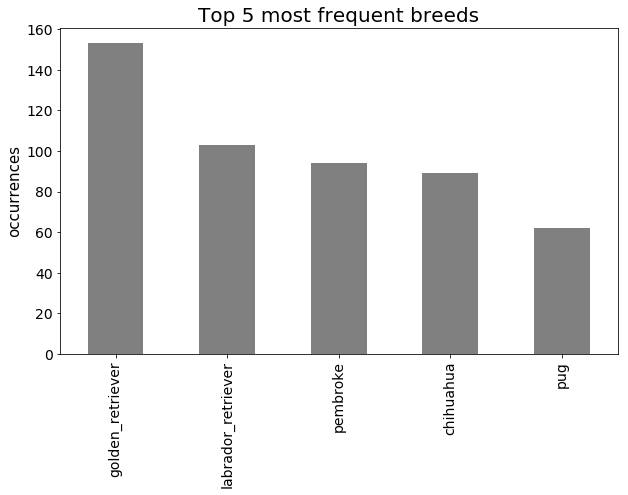

In [64]:
twitter_archive_master.breed.value_counts().nlargest(5).plot(kind='bar', label='', color=('gray'),figsize=(10,6))
pylab.ylabel("occurrences", fontsize=15)
pylab.title('Top 5 most frequent breeds', fontsize=20)
pylab.tick_params(axis='y', labelsize=14)
pylab.tick_params(axis='x', labelsize=14);

- 2. What breeds have the high favorite mean?


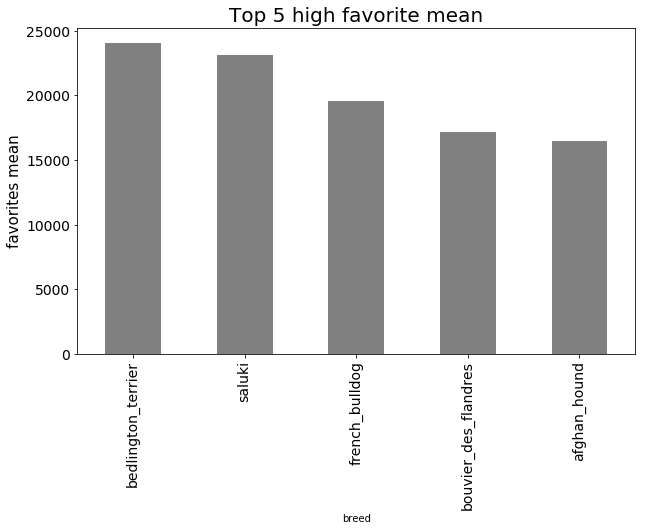

In [65]:
favorite_breeds = twitter_archive_master.groupby('breed')['favorites'].mean()
favorite_breeds.iloc[np.lexsort([-favorite_breeds.values])].nlargest(5).plot(kind='bar', color=('gray'), figsize=(10,6))
pylab.ylabel("favorites mean", fontsize=15)
pylab.title('Top 5 high favorite mean', fontsize=20)
pylab.tick_params(axis='x', labelsize=14)
pylab.tick_params(axis='y', labelsize=14)

- 3. What dogs stage receive more retweets?

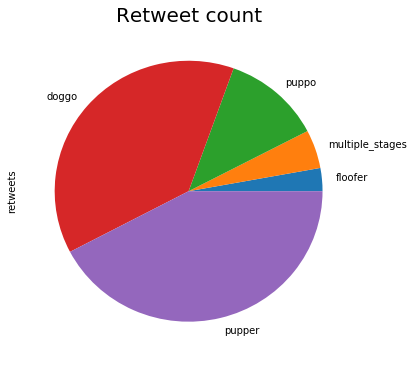

In [66]:
retweets_stages = twitter_archive_master.groupby('stage')['retweets'].sum()
retweets_stages.iloc[np.lexsort([-retweets_stages.values])].nsmallest(5).plot(kind='pie', figsize=(6,6))
pylab.title('Retweet count', fontsize=20);

In [68]:
retweets_stages.iloc[np.lexsort([-retweets_stages.values])].nsmallest(5)

stage
floofer             35059.0
multiple_stages     58480.0
puppo              146107.0
doggo              467813.0
pupper             518810.0
Name: retweets, dtype: float64

#### The most retweeted stage is *pupper*. Its important to note that most of the rows of our dataframe does not have the stage classification.